In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [30]:
X, y = mnist["data"].to_numpy(), mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


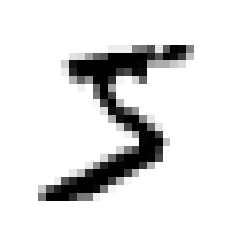

5


In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

print(y[0])

In [32]:
import numpy as np
y = y.astype(np.uint8)

In [33]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [34]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [35]:
from sklearn.linear_model import SGDClassifier

sgd_classifer = SGDClassifier(random_state=42)
sgd_classifer.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [36]:
sgd_classifer.predict([some_digit])

array([ True])

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_classifer)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

0.9701
0.9614
0.9586


In [40]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_classifer, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [41]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [43]:
never_5_classifier = Never5Classifier()
cross_val_score(never_5_classifier, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [44]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_classifer, X_train, y_train_5, cv=3)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [46]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [47]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [48]:
y_scores = sgd_classifer.decision_function([some_digit])
y_scores

array([2164.22030239])

In [50]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [51]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [52]:
y_scores = cross_val_predict(sgd_classifer, X_train, y_train_5, cv=3, method='decision_function')

In [54]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

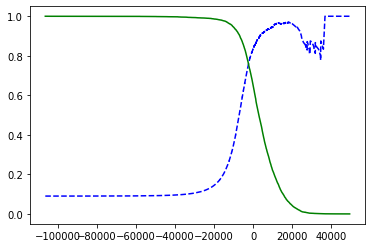

In [55]:
def plot_precision_recall_vs_threshold(precisions, recalles, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalles[:-1], 'g-', label='Recall')
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


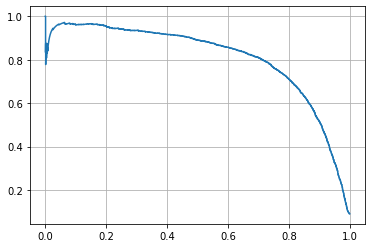

In [58]:
plt.plot(recalls, precisions)
plt.grid(True)

In [60]:
len(thresholds)

59966